<a href="https://colab.research.google.com/github/jonathanslau/math_and_cats/blob/main/Math_and_Cats_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math and Cats 1


In [ ]:
# allow graphical interactions
# %matplotlib notebook
# doesn't work in colab?

# load libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

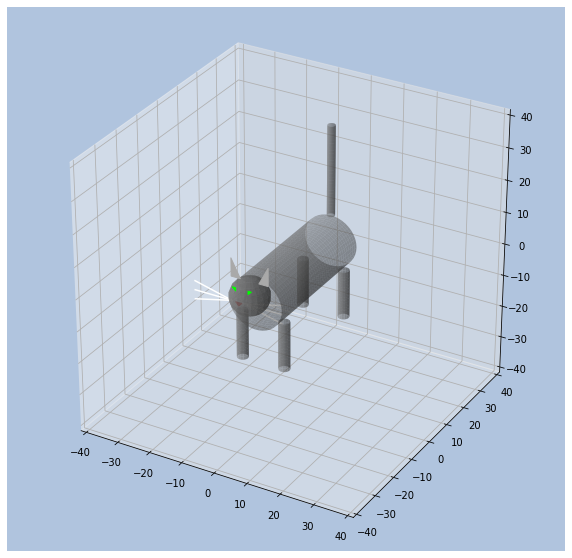

In [ ]:
# set up plot object
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# units of measure used here will be 1:1 with measurements in cm
# I want a static upper and lower bound ration on all axis on the graph to prevent distortions
# of what I am intending to draw
ax.set_xlim(-40,40)
ax.set_ylim(-40,40)
ax.set_zlim(-40,40)
ax.set_facecolor('lightsteelblue')

# function for generating cylinder coordinates
def cylinder_coordinates(center_x, center_y, radius, height_z):
    # generate z array for height/length of cylinder
    z = np.linspace(-height_z/2, height_z/2, height_z)
    # generate array for circumference of cylinder
    theta = np.linspace(0, 2*np.pi, height_z)
    theta_grid, z_grid=np.meshgrid(theta, z)
    # generate coordinates for surface of cylinder
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

# function for rotating cylinder on x axis
def rotate_cylinder_x(Xc, Yc, Zc, degrees):
    # convert degrees to radians
    theta = np.radians(degrees)
    # calculate new coordinates
    Yc_rotated = Yc * np.cos(theta) - Zc * np.sin(theta)
    Zc_rotated = Zc * np.cos(theta) + Yc * np.sin(theta)
    return Xc, Yc_rotated, Zc_rotated

# function for generating a sphere
def sphere_coordinates(center_x, center_y, radius):
    # generate coordinates for surface of sphere
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x_grid = radius * np.cos(u) * np.sin(v) + center_x
    y_grid = radius * np.sin(u) * np.sin(v) + center_y   
    z_grid = radius * np.cos(v)
    return x_grid, y_grid, z_grid

# set up a cat object
# l = length, c = circumference, r = radius
class cat:
  def __init__(self, coat_colour, eye_colour, head_c, torso_l, torso_c, limb_l, limb_c, tail_l, tail_c):
    self.coat_colour = coat_colour
    self.eye_colour = eye_colour
    self.head_c = head_c
    self.torso_l = torso_l
    self.torso_c = torso_c
    self.limb_l = limb_l
    self.limb_c = limb_c
    self.tail_l = tail_l
    self.tail_c = tail_c
    # convert circumference to radius
    pi2 = (2*np.pi)
    self.head_r = self.head_c/pi2
    self.torso_r = self.torso_c/pi2
    self.limb_r = self.limb_c/pi2
    self.tail_r = self.tail_c/pi2
  
  def estimate_sa(self):
    pi2 = (2*np.pi)
    # cat torso, area of a cylinder=2πrh+2πr2
    # we are ignoring one of the circles as that is where the cat head goes
    sa = pi2*self.torso_r*self.torso_l + 1*np.pi*self.torso_r**2
    # limbs
    # we are again ignoring one of the circles, where the limb joins the torso
    sa = sa + 4 * (pi2 * self.limb_r * self.limb_l + 1 * np.pi * self.limb_r**2)
    # tail
    sa = sa + (pi2 * self.tail_r * self.tail_l + 1 * np.pi * self.tail_r**2)
    # head, area of a sphere = 4πr2
    sa = sa + (4 * np.pi * self.head_r**2)
    # we will not consider the surface area of the ears as no fur grows there
    return sa

  def draw_kitty(self):
    pi2 = (2*np.pi)
    # cat torso
    Xc, Yc, Zc = cylinder_coordinates(0, 0, self.torso_r, self.torso_l)
    Xc, Yc, Zc = rotate_cylinder_x(Xc, Yc, Zc, 90)
    ax.plot_surface(Xc, Yc, Zc, alpha=0.5, color=self.coat_colour)
    
    # cat tail
    Xc, Yc, Zc = cylinder_coordinates(0, self.torso_l/2, self.tail_r, self.tail_l)
    # adjust positioning of tail to start at top of torso
    Zc = Zc + self.tail_l/2 + self.torso_r
    # Xc, Yc, Zc = rotate_cylinder_x(Xc, Yc, Zc, -20)
    ax.plot_surface(Xc, Yc, Zc, alpha=0.6, color=self.coat_colour)

    # cat limbs
    # position of joints will be relative to size of torso
    #set x/y positions of joints
    cat_limb_pos = {
      "front_left":[ 0.8*self.torso_r, -0.8*self.torso_l/2],
      "front_right":[ -0.8*self.torso_r, -0.8*self.torso_l/2],
      "hind_left":[ 0.8*self.torso_r, 0.8*self.torso_l/2],
      "hind_right":[ -0.8*self.torso_r, 0.8*self.torso_l/2],
    }
    for limb in cat_limb_pos:
      temp = cat_limb_pos[limb] # transfer the list in each dictionary entry to a list variable

      Xc, Yc, Zc = cylinder_coordinates(temp[0], temp[1], self.limb_r, self.limb_l)
      # adjust positioning of limb to connect with the torso
      Zc = Zc - self.limb_l/2 - self.torso_r * np.cos(np.radians(45))
      # Xc, Yc, Zc = rotate_cylinder_x(Xc, Yc, Zc, -20)
      ax.plot_surface(Xc, Yc, Zc, alpha=0.6, color=self.coat_colour)

    # cat head
    Xc, Yc, Zc = sphere_coordinates(0, -self.torso_l/2 - self.head_r/2, self.head_r)
    # position head slightly up relative to the torso
    Zc = Zc + self.torso_r/2
    ax.plot_surface(Xc, Yc, Zc, alpha=0.6, color=self.coat_colour)
    
    # piece de resistance
    # ears
    ear_y = -self.torso_l/2 - self.head_r/2 # position ears on the same y plane
    ear_z = self.torso_r/2 + 0.8*self.head_r  # lowest z coordinate relative to head
    ears =  [
      ((self.head_r,ear_y,ear_z),(self.head_r/2,ear_y,ear_z),(self.head_r,ear_y,ear_z+self.head_r)),
      ((-self.head_r,ear_y,ear_z),(-self.head_r/2,ear_y,ear_z),(-self.head_r,ear_y,ear_z+self.head_r)),
      ]
    ax.add_collection(Poly3DCollection(ears, alpha=1.0, color='darkgrey'))
    
    # nose
    nose_y = -self.torso_l/2 - self.head_r*3/2 - 0.2 # position relative to head but -1 y to make it visible
    nose_z = 1 + self.torso_r/2
    nose_x = self.head_r/6
    nose = [((-nose_x,nose_y,nose_z),(nose_x,nose_y,nose_z),(0,nose_y,nose_z-1))]
    ax.add_collection(Poly3DCollection(nose, alpha=1.0, color='darkred'))
    
    # eyes
    eye_y = -self.torso_l/2 - self.head_r/2 - self.head_r * np.sin(np.radians(45)) # attempt to position eyes at 45 degree angle
    eye_z = self.torso_r/2 + self.head_r * np.cos(np.radians(45))  # lowest z coordinate relative to head
    eye_x = self.head_r/3
    eyes =  [
      ((eye_x,eye_y,eye_z),(eye_x + 1,eye_y,eye_z),(eye_x,eye_y,eye_z-1)),
      ((-eye_x,eye_y,eye_z),(-eye_x - 1,eye_y,eye_z),(-eye_x,eye_y,eye_z-1)),
      ]
    ax.add_collection(Poly3DCollection(eyes, alpha=1.0, color='lime'))
    
    # whiskers
    # reuse coordinates from features above

    ax.plot([eye_x,eye_x + self.head_r*2],[nose_y,nose_y],[nose_z,nose_z], alpha=1.0, color='w')
    ax.plot([-eye_x,-eye_x - self.head_r*2],[nose_y,nose_y],[nose_z,nose_z], alpha=1.0, color='w')
    ax.plot([eye_x,eye_x + self.head_r*2],[nose_y,nose_y],[nose_z,nose_z - self.head_r/2], alpha=1.0, color='w')
    ax.plot([-eye_x,-eye_x - self.head_r*2],[nose_y,nose_y],[nose_z,nose_z - self.head_r/2], alpha=1.0, color='w')
    ax.plot([eye_x,eye_x + self.head_r*2],[nose_y,nose_y],[nose_z,nose_z + self.head_r/2], alpha=1.0, color='w')
    ax.plot([-eye_x,-eye_x - self.head_r*2],[nose_y,nose_y],[nose_z,nose_z + self.head_r/2], alpha=1.0, color='w')
      
# coat_colour, eye colour, head_c, torso_l, torso_c, limb_l, limb_c, tail_l, tail_c
# pass Rocco measurements and render onto graph
rocco = cat('grey', 'green', 35, 40, 50, 15, 10, 28, 7)
rocco.draw_kitty()

# test
# small_cat = cat('orange', 'green', 28, 33, 30, 9, 7, 22, 5)
# small_cat.draw_kitty()

plt.show()

In [ ]:
# given his measurements, how much surface area does he have?
print('The surface area of Rocco is approximately ' + str(round((rocco.estimate_sa()/10000),3)) + ' m^2.')

The surface area of Rocco is approximately 0.342 m^2.


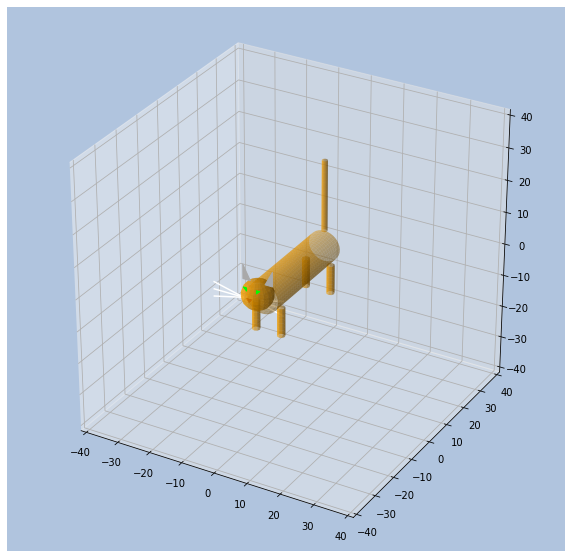

In [ ]:
# hypothetical orange tabby
ax.clear()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-40,40)
ax.set_ylim(-40,40)
ax.set_zlim(-40,40)
ax.set_facecolor('lightsteelblue')

small_cat = cat('orange', 'green', 28, 33, 30, 9, 7, 22, 5)
small_cat.draw_kitty()

plt.show()

In [ ]:
# hypothetical cat, on the small end
small_cat = cat('orange', 'green', 28, 33, 30, 9, 7, 22, 5)

print('Our small hypothetical cat has a surface area of approximately ' + str(round(small_cat.estimate_sa()/10000, 3)) + ' m^2.')

Our small hypothetical cat has a surface area of approximately 0.169 m^2.
